<a href="https://colab.research.google.com/github/Sau1o/visaoComputacional/blob/main/Autoencoders_para_compress%C3%A3o_de_imagens_do_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoders para compressão de imagens

### Importação das bibliotecas

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, AveragePooling2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.8.0'

### Carregamento da base de dados

- Dataset: https://keras.io/api/datasets/cifar10/ and https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [6]:
32 * 32

1024

### Visualização das imagens

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


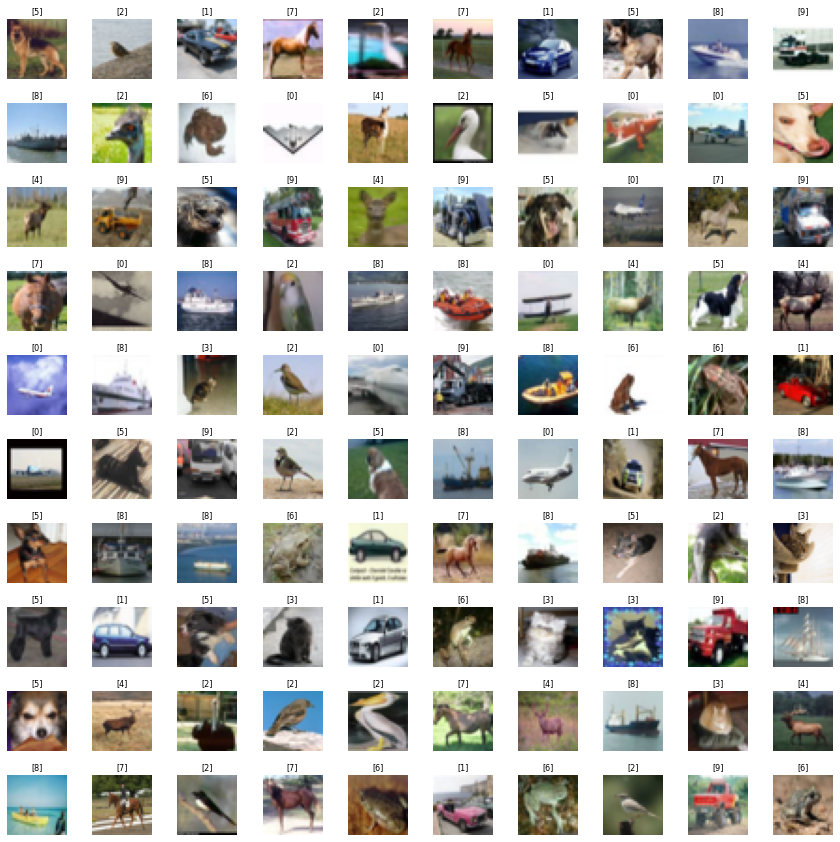

In [7]:
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 50000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(y_train[index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4);

### Pré-processamento das imagens

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

### Construção e treinamento do autoencoder convolucional

In [10]:
# BatchNormalization: https://keras.io/api/layers/normalization_layers/batch_normalization/

autoencoder = tf.keras.models.Sequential()

# Encoder
autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding='same', input_shape=(32, 32, 3)))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same"))

autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(AveragePooling2D((2,2), padding="same")) # Imagem codificada

# Decoder
autoencoder.add(Conv2D(16, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(32, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(64, (3,3), activation = 'relu', padding="same"))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2, 2)))

autoencoder.add(Conv2D(3, (3,3), activation='sigmoid', padding="same"))

In [11]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                        

In [12]:
# Output = (Input - Filter + 1) / Stride

In [13]:
autoencoder.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 346s 221ms/step - loss: 0.5822 - accuracy: 0.6461
Epoch 2/50
1563/1563 [==============================] - 349s 224ms/step - loss: 0.5679 - accuracy: 0.7216
Epoch 3/50
1563/1563 [==============================] - 350s 224ms/step - loss: 0.5647 - accuracy: 0.7377
Epoch 4/50
1563/1563 [==============================] - 350s 224ms/step - loss: 0.5633 - accuracy: 0.7482
Epoch 5/50
1563/1563 [==============================] - 351s 224ms/step - loss: 0.5626 - accuracy: 0.7532
Epoch 6/50
1563/1563 [==============================] - 351s 224ms/step - loss: 0.5620 - accuracy: 0.7568
Epoch 7/50
1563/1563 [==============================] - 350s 224ms/step - loss: 0.5615 - accuracy: 0.7614
Epoch 8/50
1563/1563 [==============================] - 348s 222ms/step - loss: 0.5611 - accuracy: 0.7635
Epoch 9/50
1563/1563 [==============================] - 348s 222ms/step - loss: 0.5609 - accuracy: 0.7635
Epoch 10/50
1563/1563 [=======================

### Codificação e decodificação das imagens de teste

In [15]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('average_pooling2d_2').output)
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128   

In [16]:
coded_test_images = encoder.predict(X_test)

In [17]:
coded_test_images.shape

(10000, 4, 4, 16)

In [18]:
coded_test_images[0]

array([[[-0.21716893,  0.4927535 , -0.6831909 ,  0.39734364,
          0.01091364,  0.0245343 , -0.1412386 , -0.00946979,
          0.39726448, -0.14682415, -0.38685182, -0.0647247 ,
          0.00405889,  0.28683364,  0.03183487,  0.15401399],
        [ 0.14461821,  0.01956071, -0.6512383 ,  0.03896201,
         -0.48889557, -0.05242475, -0.18158372, -0.04010615,
          0.12239954, -0.23723854, -0.41619706,  0.01848276,
          0.02178114, -0.12530117, -0.05285217, -0.17475605],
        [-0.1773606 ,  0.4017664 , -0.2832306 , -0.02310379,
          0.18999012, -0.15908706, -0.3861945 , -0.25914627,
          0.03188331, -0.23411357, -0.09591829,  0.16456935,
          0.01698986,  0.2960475 , -0.01807337,  0.02391991],
        [ 0.1502656 ,  0.204038  , -0.56403637,  0.39109182,
          0.28590974, -0.01553352, -0.09747972,  0.05703049,
          0.01249258, -0.25889468, -0.11785215,  0.2131727 ,
         -0.20351666,  0.3553218 ,  0.25707653, -0.03429338]],

       [[ 0.100008

In [19]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 32, 32, 3)

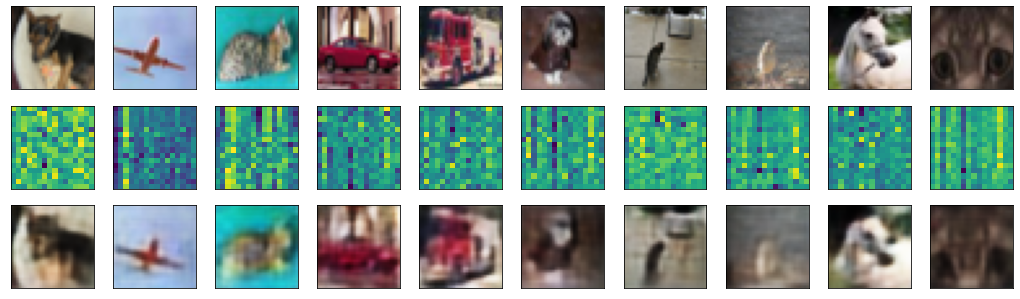

In [20]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  
  # Imagem original
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())
    
  # Imagem codificada
  ax = plt.subplot(10,10,i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,16))
  plt.xticks(())
  plt.yticks(())
    
  # Imagem decodificada
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(32,32,3))
  plt.xticks(())
  plt.yticks(())